***Logistic Regression***

***Visualize the Data*** <br/>
In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

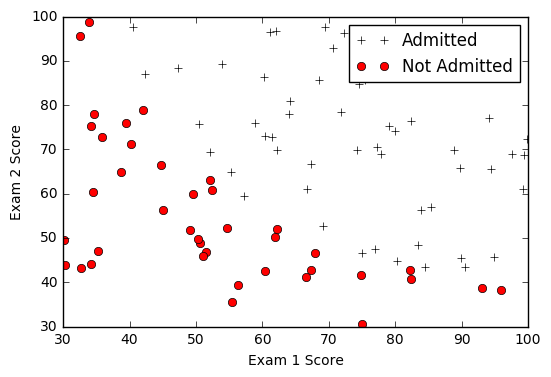

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

#Get Data File
data_file = 'ex2/ex2data1.txt'
data = np.loadtxt(data_file, delimiter = ',')

#X = First Two Columns (In Column Form)
X = data[:, 0:2]
#y = Last Column (In Row Form)
y = data[:, 2]
#Change Y to a Column Matrix from Row Matrix
y = y.reshape((-1, 1))
#Plot the Data
pos = np.where(y == 1)[0]    #Gets the index of 1's in y (Admitted)
neg = np.where(y == 0)[0]    #Gets the index of 0's in y (Not Admitted)
plt.plot(X[pos, 0], X[pos, 1], 'k+', label = 'Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'ro', label = 'Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

***Compute Cost and Gradient*** <br\>
Logistic Regression Hypothesis is defined by: <br\>
$$h_{\theta}(x) = g(\theta^{T}x)$$ <br\>
Function g is the Sigmoid Function. Sigmoid Function is defined by: <br\>
$$g(z) = \frac{1}{1 + e^{-z}}$$ <br\>
Cost Function in logistic regression: <br\>
$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$ <br\>
and the gradient of the cost is a vector of the same length as $\theta$ where the jth
element (for j = 0, 1, . . . , n) is dened as follows: <br\>
$$\frac{\alpha J(\theta)}{\alpha\theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$$

In [2]:
#Sigmoid Function
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def costFunction(theta, X, y):
    #Get # of Training Examples
    m = y.shape[0]
    J = 0
    grad = np.zeros(theta.shape)
    hypothesis = sigmoid(np.dot(X, theta)).reshape(-1, 1)
    J = np.sum(-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)) / m
    grad = np.sum((hypothesis - y) * X, axis = 0 / m)
    return J, grad

#Get # of Training Examples
m, n = X.shape
X = np.column_stack((np.ones(m), X))
initial_theta = np.zeros((n + 1, 1))
cost, grad = costFunction(initial_theta, X, y)
print 'Cost at initial theta (zeros): %f ' % cost
print 'Gradient at initial theta (zeros): ', grad

Cost at initial theta (zeros): 0.693147 
Gradient at initial theta (zeros):  [  -10.         -1200.92165893 -1126.28422055]


In the previous assignment, you found the optimal parameters of a linear re-
gression model by implementing gradent descent. You wrote a cost function
and calculated its gradient, then took a gradient descent step accordingly.
This time, instead of taking gradient descent steps, you will use an Octave/-
MATLAB built-in function called fminunc.

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Cost at theta found by fmin: 0.203498
theta:  [-25.16130062   0.20623142   0.20147143]


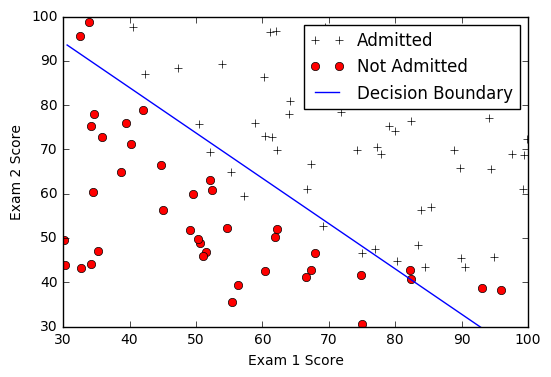

In [3]:
#libraries
from scipy.optimize import fmin

fmin_ret = fmin(lambda t : costFunction(t, X, y)[0], initial_theta, maxiter = 400, full_output = True)
    
theta = fmin_ret[0]
cost = fmin_ret[1]
print 'Cost at theta found by fmin: %f' % cost
print 'theta: ', theta

#X = First Two Columns (In Column Form)
X = data[:, 0:2]
#y = Last Column (In Row Form)
y = data[:, 2]
#Change Y to a Column Matrix from Row Matrix
y = y.reshape((-1, 1))
#Plot the Data
pos = np.where(y == 1)[0]    #Gets the index of 1's in y (Admitted)
neg = np.where(y == 0)[0]    #Gets the index of 0's in y (Not Admitted)
plt.plot(X[pos, 0], X[pos, 1], 'k+', label = 'Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'ro', label = 'Not Admitted')

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
#Get the Decision Boundary for X and Y
plot_x = np.array([np.min(X[:,1]), np.max(X[:,1])])
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
#Add the Decision Boundary
plt.plot(plot_x,plot_y, label = 'Decision Boundary')
plt.xlim(30, 100)
plt.ylim(30, 100)
plt.legend()
plt.show()

***Prediction and Accuracies***

In [4]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros((m, 1))
    p[np.where(sigmoid(np.dot(X, theta)) > 0.5)] = 1
    return p

#Prediction and Accuracies
X = np.column_stack((np.ones(m), X))
prob = sigmoid(np.dot([1, 45, 85], theta))
print 'For a student with scores 45 and 85, we predict an admission probability of %f' % prob

p = predict(theta, X)

print 'Train Accuracy: %f' % (np.mean(p == y) * 100)

For a student with scores 45 and 85, we predict an admission probability of 0.776292
Train Accuracy: 89.000000
